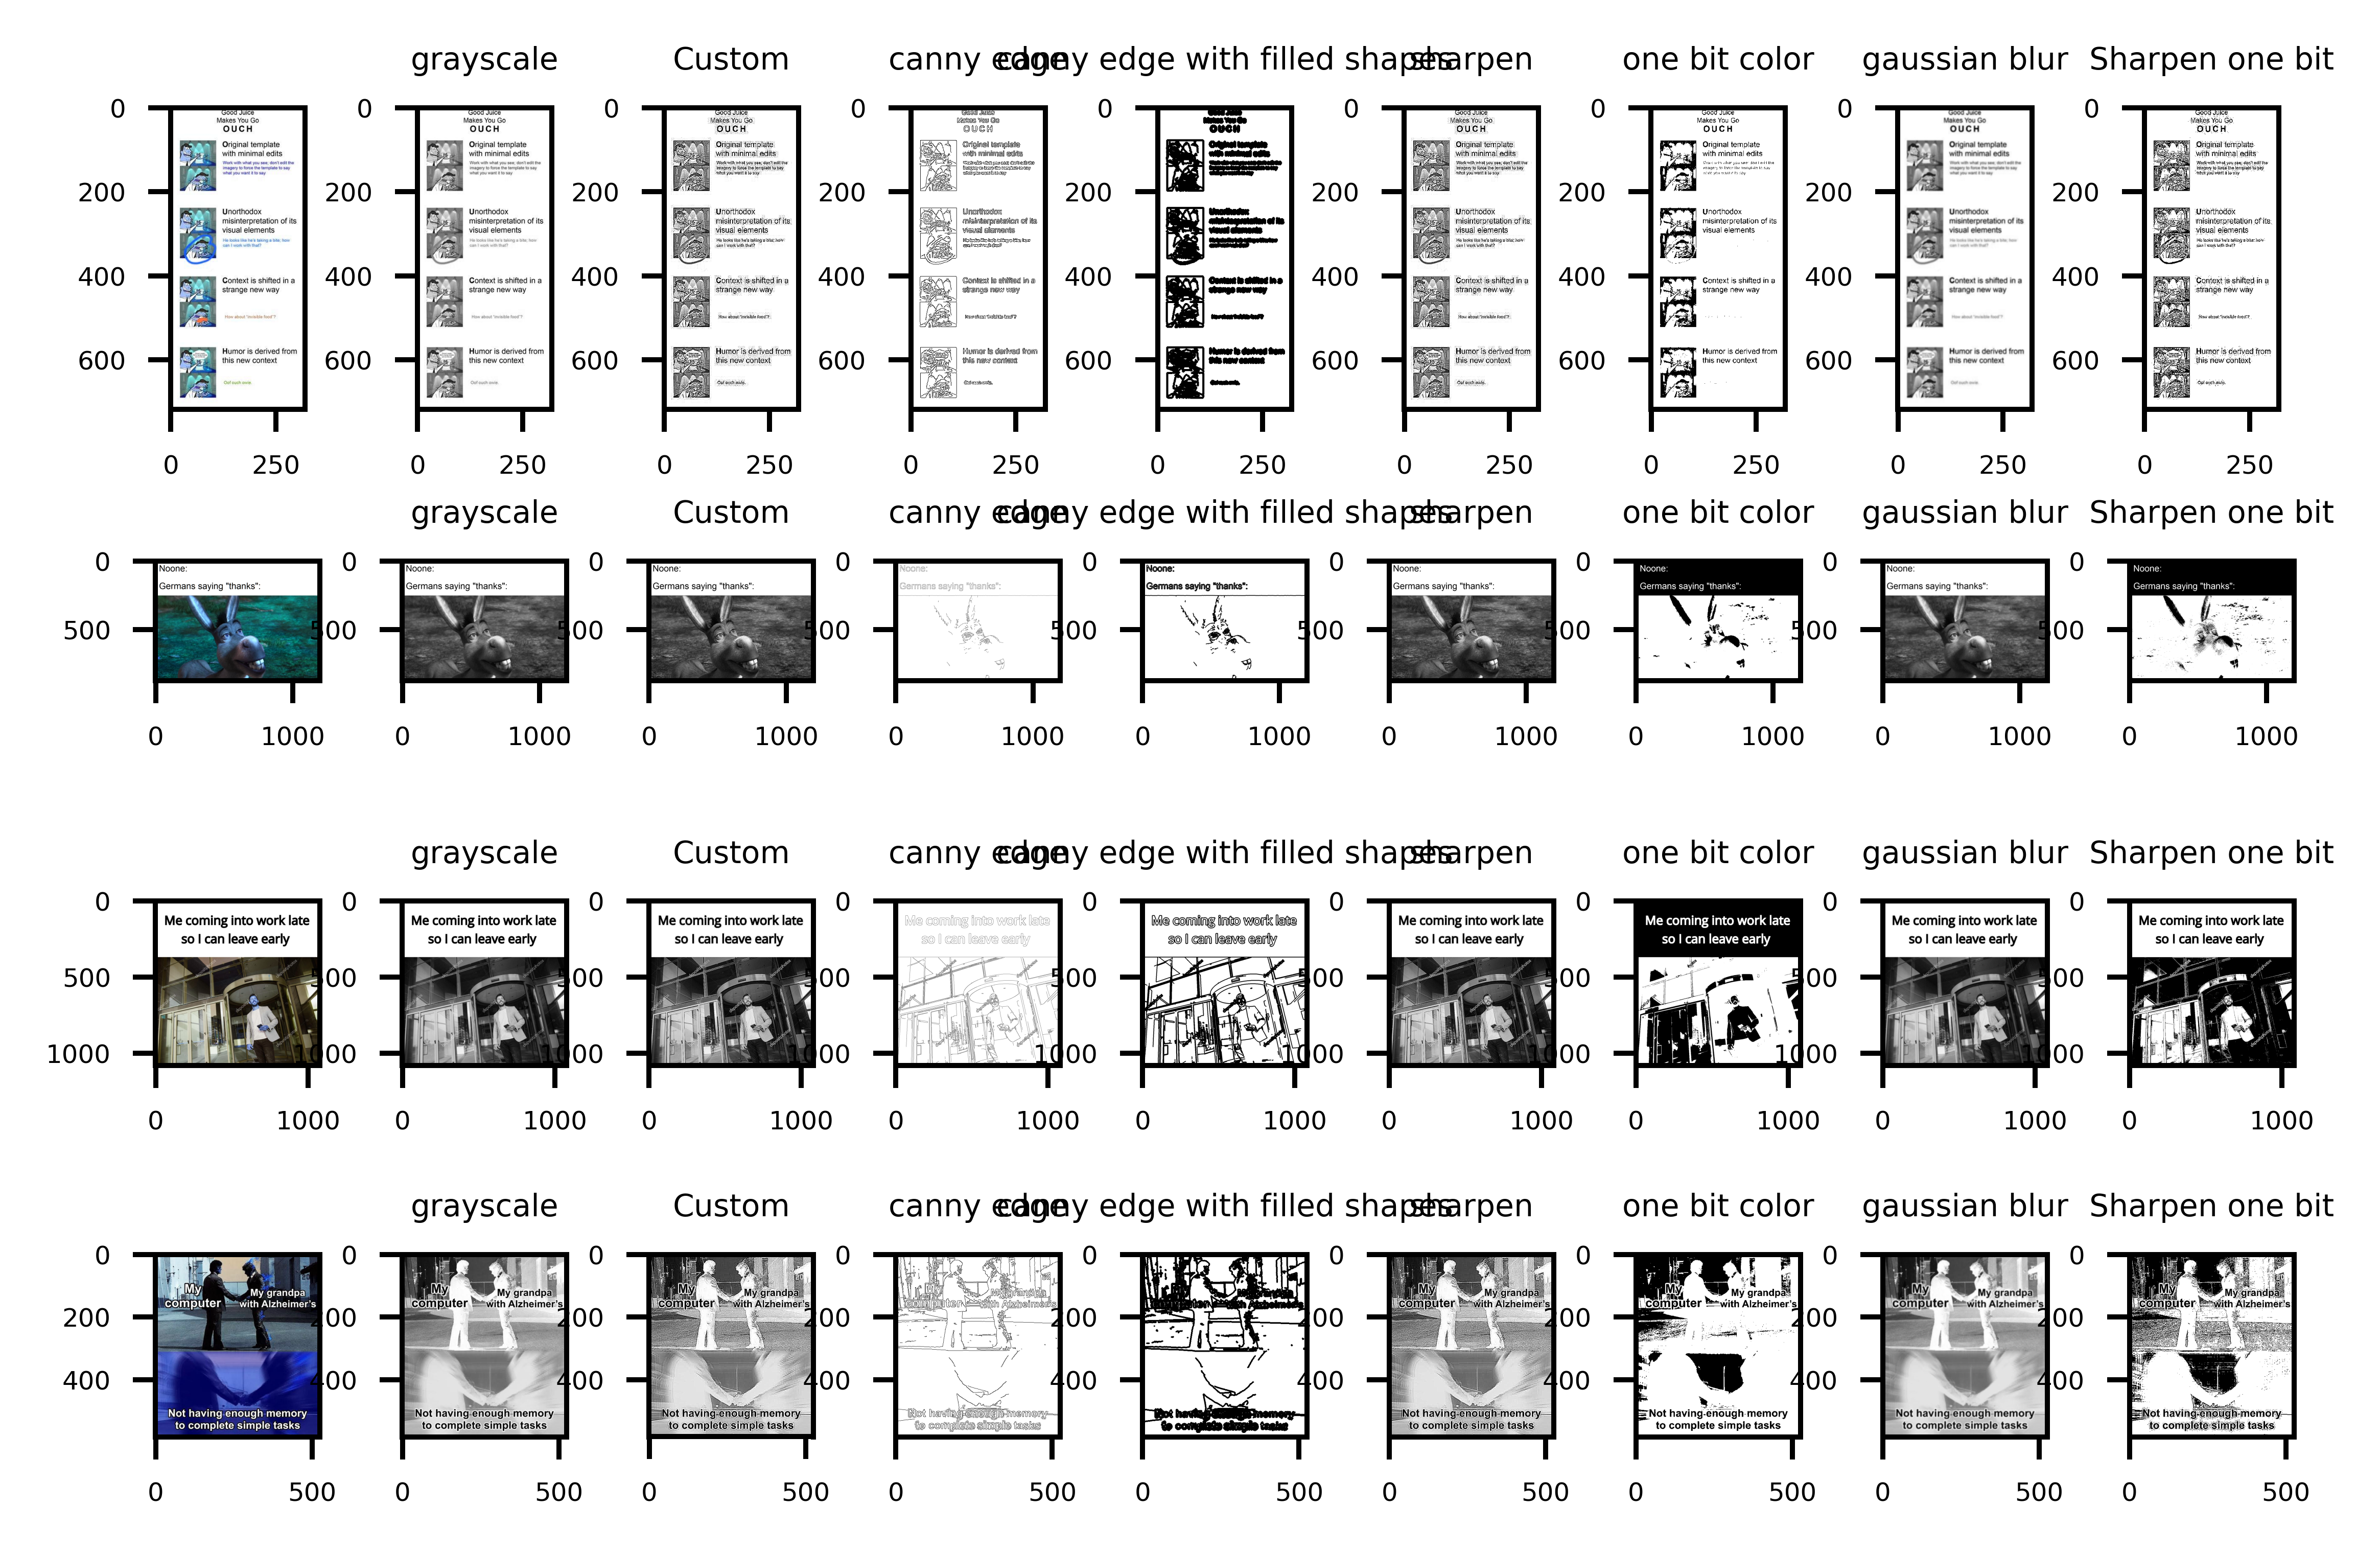

In [1]:
import cv2
from sys import path
import matplotlib.pyplot as plt

path.append("../src")

import filter

# load uctnxg.jpg from memes folder
images = [None] * 4
images[0] = cv2.imread("../memes/uctnxg.jpg")
images[1] = cv2.imread("../memes/xpe0t6.png")
images[2] = cv2.imread("../memes/xpedwn.jpg")
images[3] = cv2.imread("../memes/xpd408.jpg")

plt.figure(dpi=900)

# set fontsize
plt.rcParams.update({'font.size': 4})

# set margin between subplots
plt.subplots_adjust(wspace=0.5)

filters = [filter.GrayscaleFilter(), filter.Custom(), filter.CannyEdgeFilter(), filter.CannyEdgeWithFilledShapesFilter(), filter.SharpenFilter(), filter.OneBitColorFilter(), filter.GaussianBlurFilter(), filter.SharpenOneBit()]

# x axis is the filter, y axis is the image
for imageIndex in range(len(images)):
    # first render the original image
    plt.subplot(len(images), len(filters) + 1, imageIndex * (len(filters) + 1) + 1)
    plt.imshow(images[imageIndex])

    for filterIndex in range(len(filters)):
        plt.subplot(len(images), len(filters) + 1, imageIndex * (len(filters) + 1) + filterIndex + 2)
        filteredImage = filters[filterIndex].filter(images[imageIndex])
        normalizedFilteredImage = filter.NormalizeFilter().filter(filteredImage)
        plt.imshow(normalizedFilteredImage, cmap="gray")
        plt.title(str(filters[filterIndex]))

plt.show()

